# **Pytorch MNIST**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv(
    "D://admp_northallerton/my_machine_learning/datasets/MNIST_dataset.csv"
)

In [ ]:
X = data.drop(columns=["label"]).values
y = data["label"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (29400, 784)

y_train shape: (29400,)

X_test shape: (12600, 784)

y_test shape: (12600,)


In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, y, transform=None):
        self.X = torch.tensor(X)
        self.y = torch.tensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [ ]:
epochs = 10
batch_size = 64
learning_rate = 0.001

In [ ]:
train_data = Dataset(X_train, y_train)
test_data = Dataset(X_test, y_test)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = x.type(torch.float32)
        return self.layers(x)

In [ ]:
net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=net.parameters(), lr=learning_rate)

In [ ]:
loaders = {
    "train": train_dataloader,
    "test": test_dataloader
}

In [ ]:
accuracy = {"train": [], "test": []}

for epoch in range(epochs):
    epoch_correct = 0
    epoch_all = 0

    for k, dataloader in loaders.items():
        for X_batch, y_batch in dataloader:
            if k == "train":
                net.train()
                out = net.forward(X_batch)
                loss = criterion(out, y_batch)
                optimizer.zero_grad()  
                loss.backward()
                optimizer.step()
            else:
                net.eval()

                with torch.no_grad():  
                    out = net.forward(X_batch)

            predictions = out.argmax(-1)
            correct = torch.tensor(y_batch[y_batch==predictions].size())
            all = batch_size
            epoch_correct += correct.item()
            epoch_all += all

        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1

Loader: train. Accuracy: 0.8933483115468409

Loader: test. Accuracy: 0.9045324427480916

Epoch: 2

Loader: train. Accuracy: 0.9487336601307189

Loader: test. Accuracy: 0.9482108778625954

Epoch: 3

Loader: train. Accuracy: 0.9592184095860566

Loader: test. Accuracy: 0.9573950381679389

Epoch: 4

Loader: train. Accuracy: 0.9675925925925926

Loader: test. Accuracy: 0.9621660305343511

Epoch: 5

Loader: train. Accuracy: 0.9703839869281046

Loader: test. Accuracy: 0.9657919847328245

Epoch: 6

Loader: train. Accuracy: 0.971609477124183

Loader: test. Accuracy: 0.9682013358778626

Epoch: 7

Loader: train. Accuracy: 0.9753540305010894

Loader: test. Accuracy: 0.9699427480916031

Epoch: 8

Loader: train. Accuracy: 0.978656045751634

Loader: test. Accuracy: 0.9747375954198473

Epoch: 9

Loader: train. Accuracy: 0.9764773965141612

Loader: test. Accuracy: 0.9732108778625954

Epoch: 10

Loader: train. Accuracy: 0.9784177559912854

Loader: test. Accuracy: 0.9737118320610687


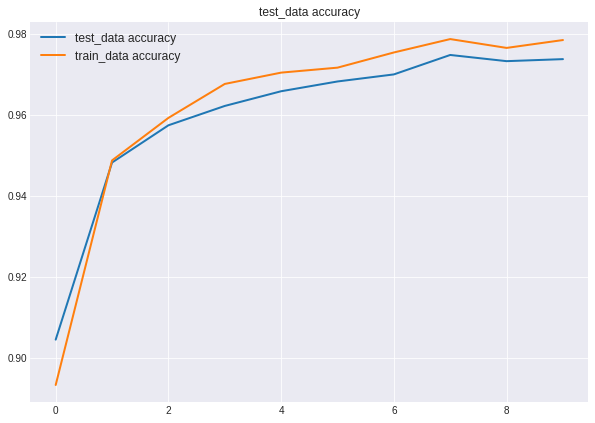

In [ ]:
plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(10, 7))

plt.title("test_data accuracy")
plt.plot(range(epochs), accuracy["test"], linewidth=2, label="test_data accuracy")
plt.plot(range(epochs), accuracy["train"], linewidth=2, label="train_data accuracy")
plt.legend(fontsize=12)
plt.show()

In [ ]:
test_img = X_test[1212]
test_label = y_test[1212]

test_img_tensor = torch.tensor(test_img)
test_img_tensor = test_img_tensor.type(torch.float32)
test_img_tensor = test_img_tensor.view(1, 784)

net.eval()

prediction = net.forward(test_img_tensor).argmax(-1)[0]

label: 5

prediction: 5


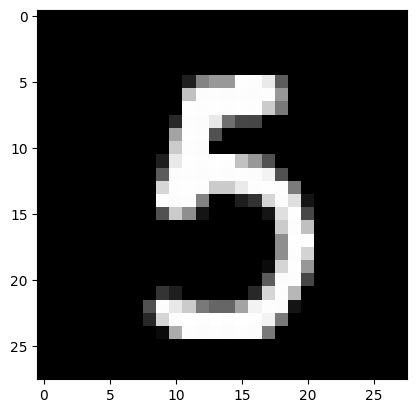

In [ ]:
print(f"label: {test_label}")
print(f"prediction: {prediction}")

plt.style.use("default")
plt.gray()

current_image = test_img.reshape((28, 28))
plt.imshow(current_image)

plt.show()